Aim:   Implement Logistic Regression
Krisha Goti C035

In [ ]:
#Krisha Goti C035
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Krisha Goti C035
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,us,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,us,6 days left
2,2,5350,dodge,mpv,2018,salvage insurance,39590,silver,3c4pdcgg5jt346413,167655728,georgia,us,2 days left
3,3,25000,ford,door,2014,salvage insurance,64146,blue,1ftfw1et4efc23745,167753855,virginia,us,22 hours left
4,4,27700,chevrolet,1500,2018,salvage insurance,6654,red,3gcpcrec2jg473991,167763266,florida,us,22 hours left


In [ ]:
#Krisha Goti C035
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['model','brand','country','state','vin','title_status','condition','color','lot','price']

for columns in categorical_columns:
  label_encoder = LabelEncoder()
  label_encoder.fit(df[columns])
  df[columns] = label_encoder.transform(df[columns])


In [ ]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,166,27,25,2008,0,274117,2,2392,0,24,1,3
1,1,58,8,92,2011,0,190552,39,1665,1,35,1,39
2,2,139,7,75,2018,1,39590,39,1885,762,7,1,16
3,3,522,8,32,2014,1,64146,4,967,1427,39,1,20
4,4,579,5,0,2018,1,6654,34,2087,1580,6,1,20


In [ ]:
X = df['year'].values.reshape(-1, 1)
y = df['title_status']

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [ ]:
model.intercept_

array([-6.09145457e-07])

In [ ]:
model.coef_

array([[-0.00123443]])

In [ ]:
model.predict_proba(X)

array([[0.92263774, 0.07736226],
       [0.92290165, 0.07709835],
       [0.92351426, 0.07648574],
       ...,
       [0.92351426, 0.07648574],
       [0.92351426, 0.07648574],
       [0.92351426, 0.07648574]])

In [ ]:
model.score(X, y)

0.9231692677070829

In [ ]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_matrix= metrics.confusion_matrix(y, model.predict(X))

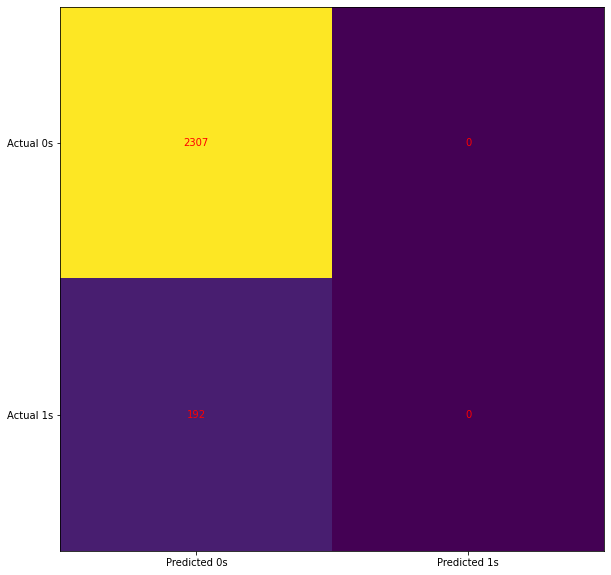

In [ ]:
#Krisha Goti C035
cm =metrics.confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

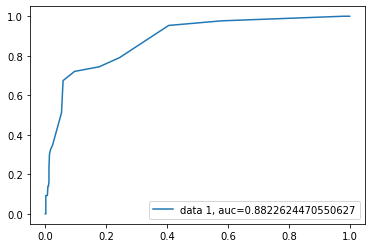

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
#Aim:   Implement Decision tree classifier on real world dataset using sklearn package in python.

# Krisha Goti C035

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)
preds = model.predict(X_test)
score=model.score(X_test, y_test)
print(score)

0.936


In [ ]:
features = df.columns
features


Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

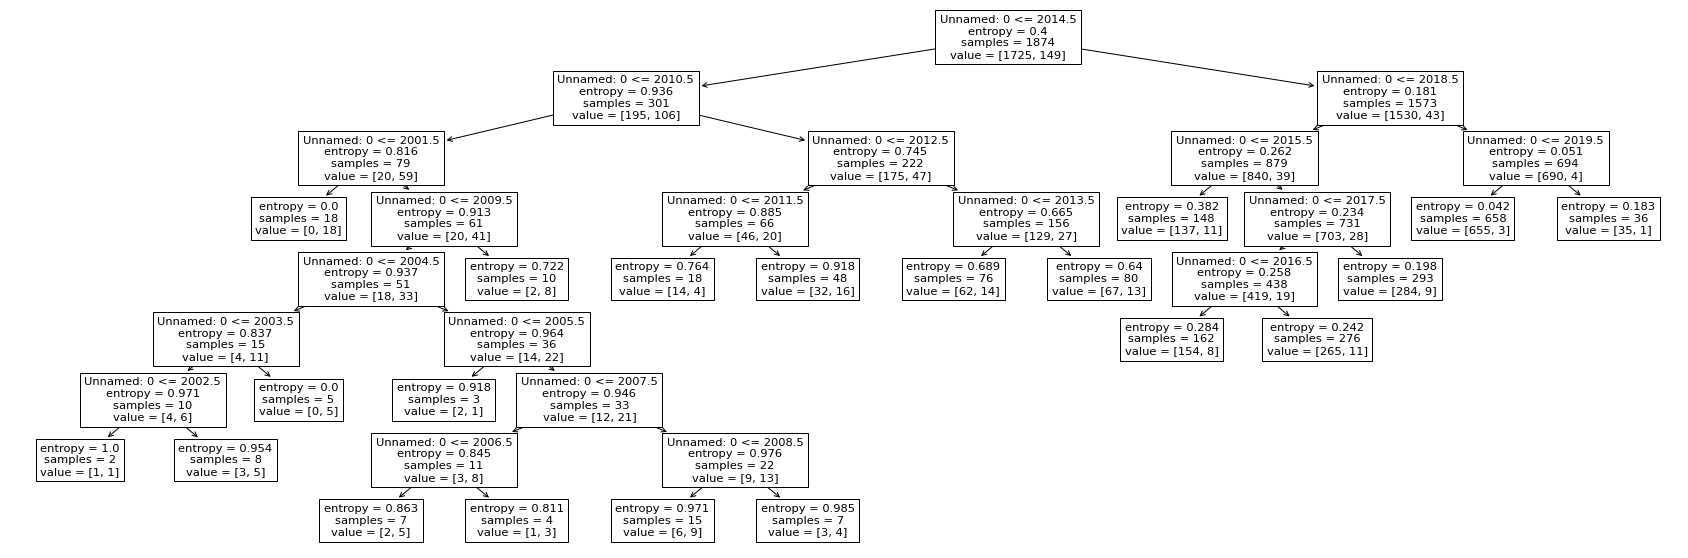

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plot_tree(model, feature_names = features)
plt.show()


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydot
from sklearn import tree
import graphviz
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


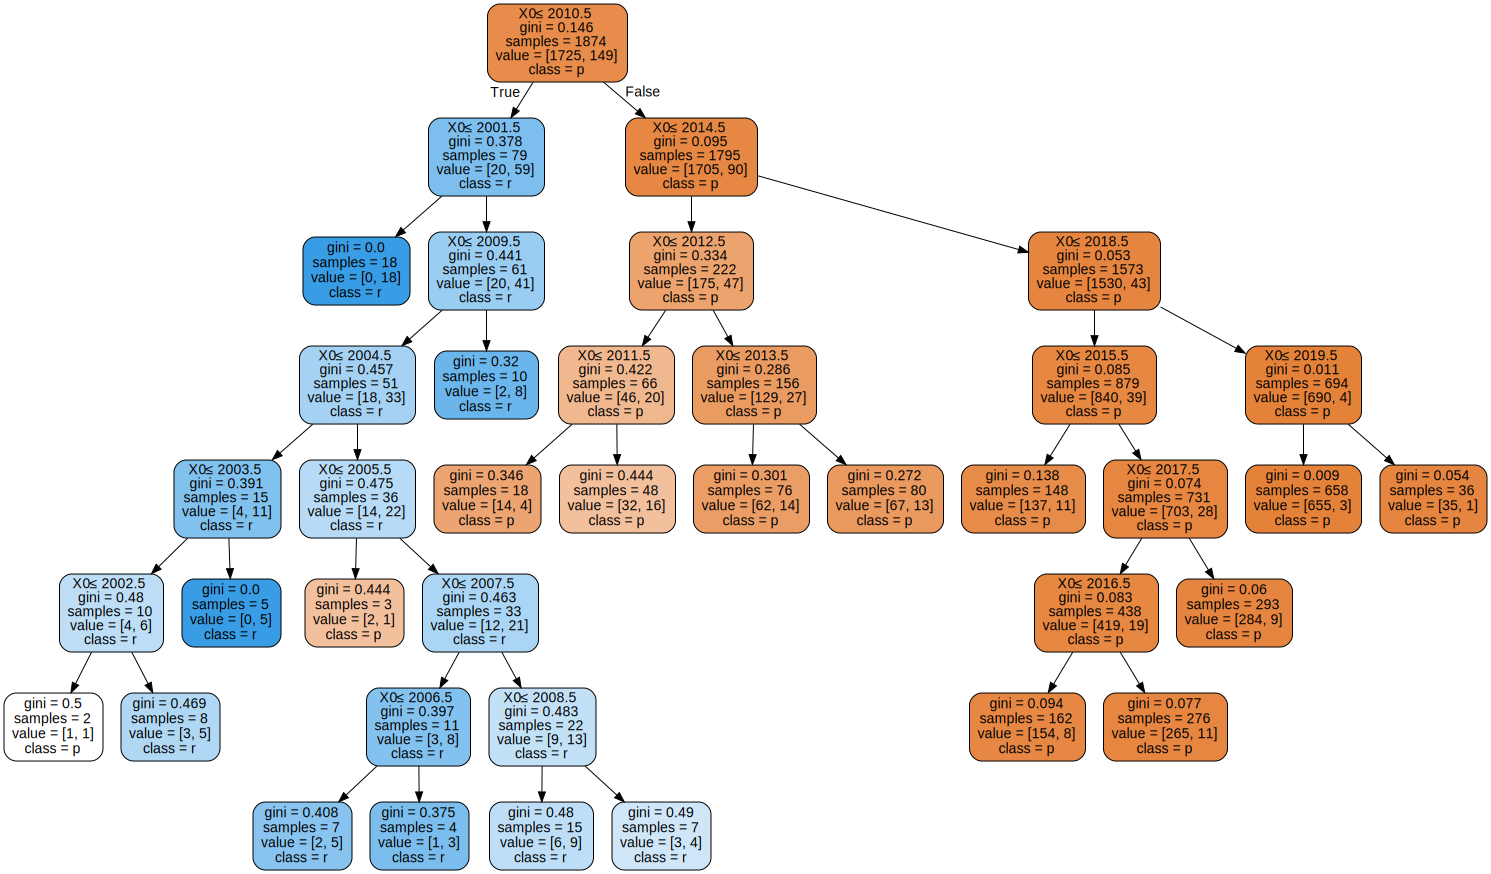

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                     class_names='price',
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('test')
graph


**EXP 8**

#  Random forest

In [ ]:
# Aim:   Implement Ensemble Learning (Random Forest and AdaBoost Algorithm) on real world
#C035 Krisha Goti
from sklearn import tree
import graphviz

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
y_predict_randomF = clf.predict(X_test)

print('Random Forest Accuracy:',metrics.accuracy_score(y_test,y_pred=y_predict_randomF))

Random Forest Accuracy: 0.9376


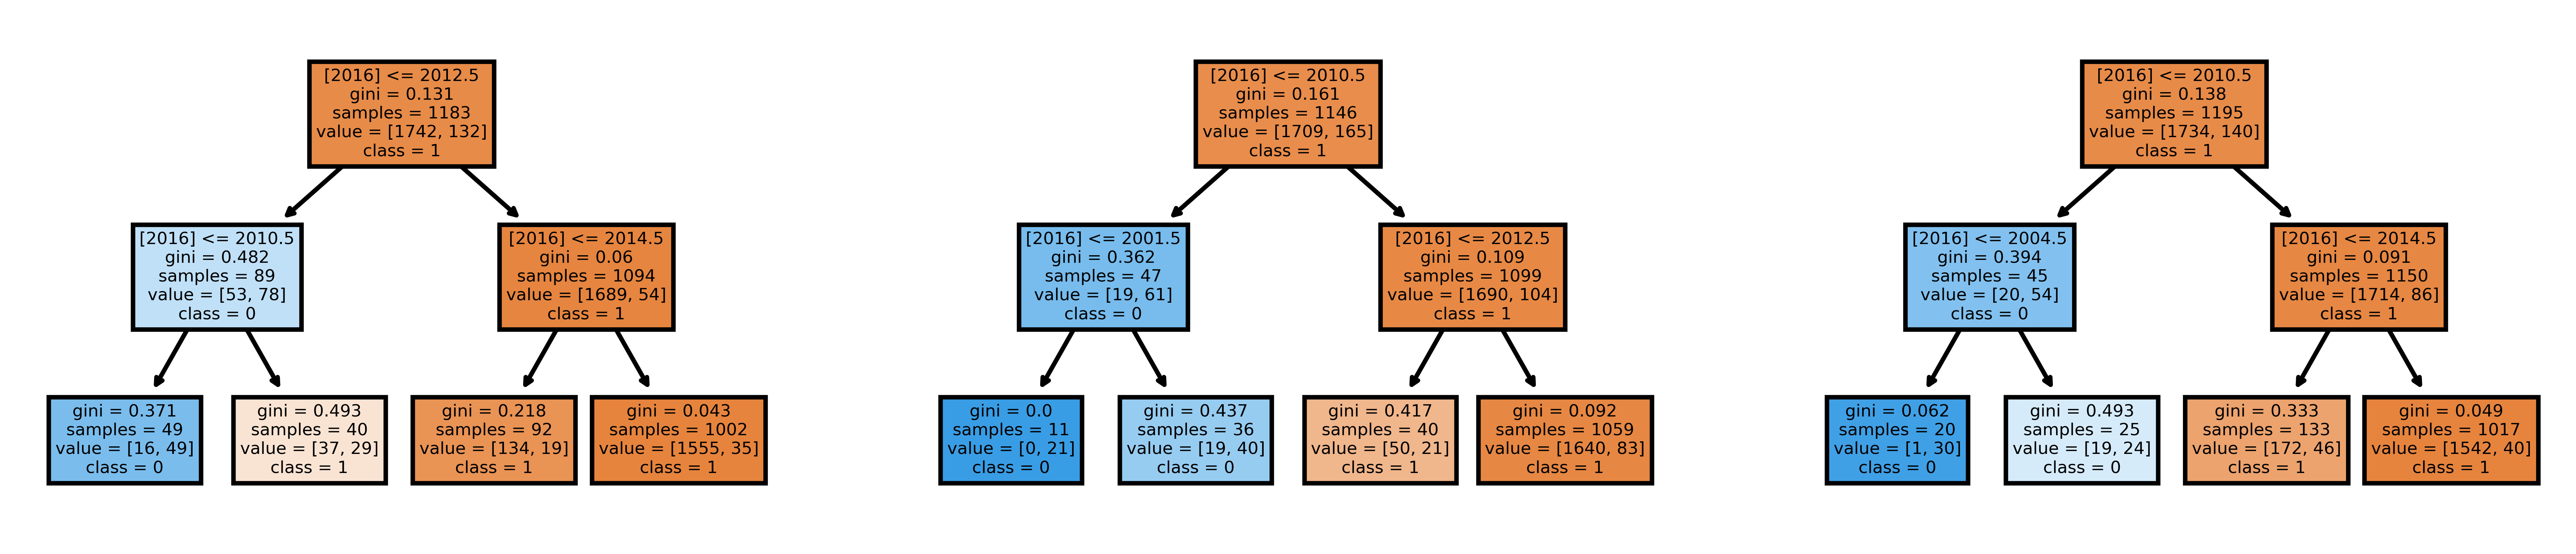

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)

for index in range(0, 3):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train,
                   class_names = ['1','0'],
                   filled = True,
                   ax = axes[index]);

# AdaBoost Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
y_predict_adaBoost = clf.predict(X_test)

print('AdaBoost Algorithm Accuracy:',metrics.accuracy_score(y_test,y_pred=y_predict_adaBoost))

AdaBoost Algorithm Accuracy: 0.936


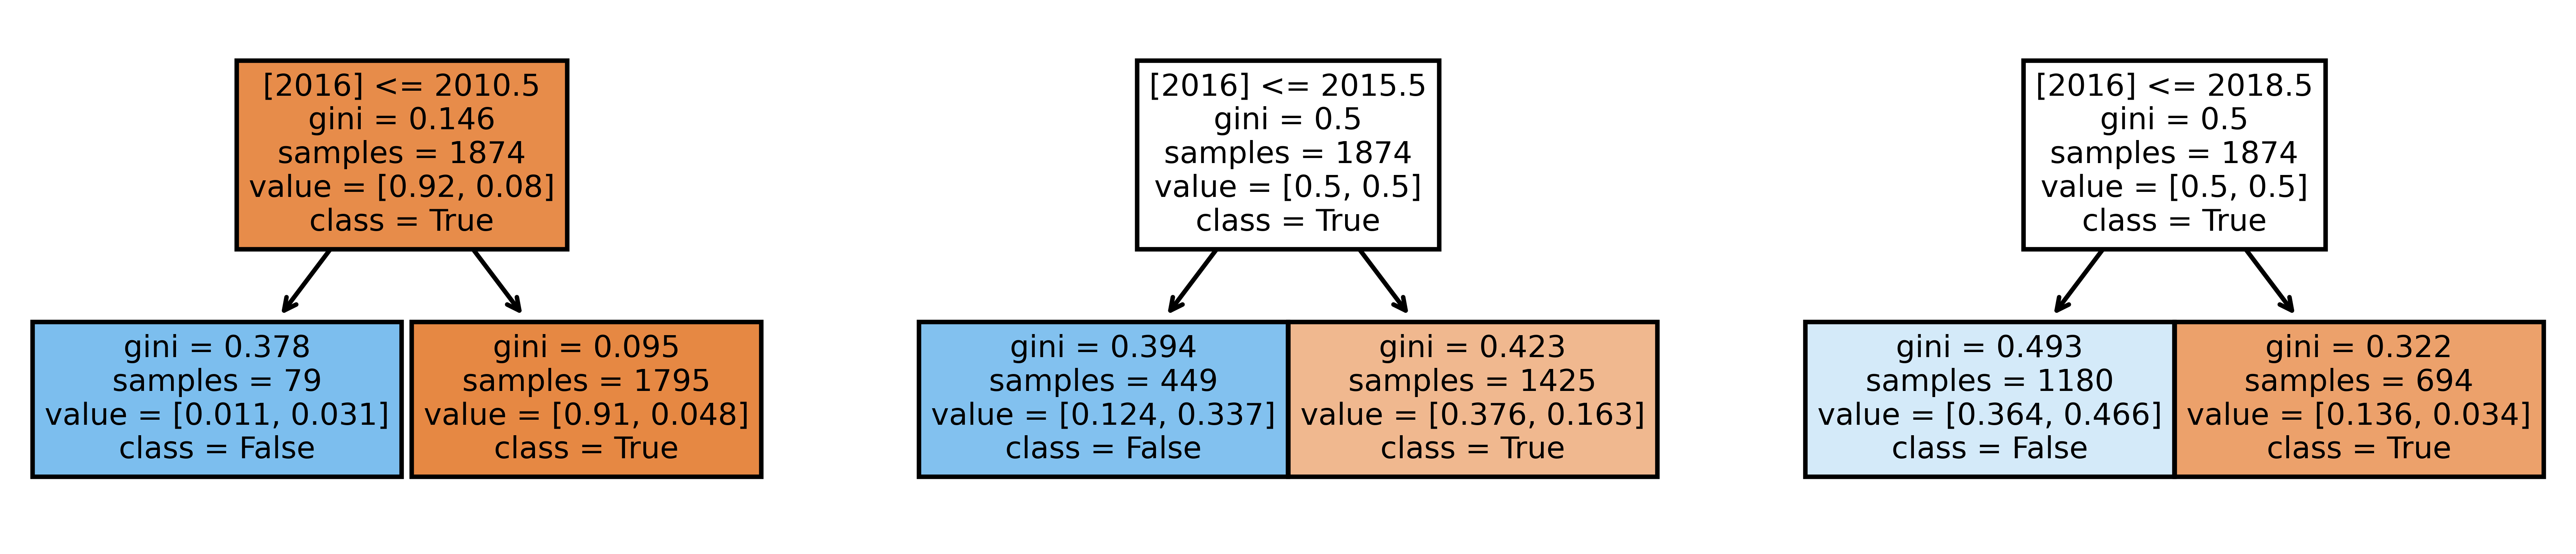

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)

for index in range(0, 3):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = X_train,
                   class_names = ['True','False'],
                   filled = True,
                   ax = axes[index]);

Exp 9

In [ ]:
#Krisha Goti C035
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
x = df.filter(items=['lot','brand'])
y = df['title_status']

In [ ]:
model = KMeans(n_clusters=2, random_state=0)
label = model.fit_predict(x)
label

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
x['label'] = label

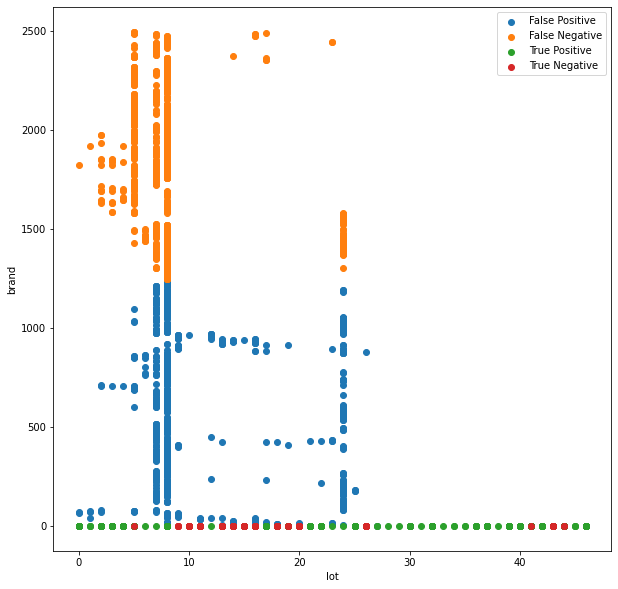

In [ ]:
filtered_label0 = x[(x['label'] == 0)]
filtered_label1 = x[(x['label'] == 1)]

# df_train['Transported']
unfiltered_label0 = df[(df['title_status'] == 0)]
unfiltered_label1 = df[(df['title_status'] == 1)]

plt.figure(figsize=(10,10))
plt.scatter(filtered_label0.iloc[:,1] , filtered_label0.iloc[:,0],label = 'False Positive')
plt.scatter(filtered_label1.iloc[:,1] , filtered_label1.iloc[:,0],label = 'False Negative')

plt.scatter(unfiltered_label0.iloc[:,12] , unfiltered_label0.iloc[:,11],label = 'True Positive')
plt.scatter(unfiltered_label1.iloc[:,12] , unfiltered_label1.iloc[:,11],label = 'True Negative')

plt.xlabel("lot")
plt.ylabel("brand")
plt.legend()
plt.show()

In [ ]:
print('KMeans Algorithm Accuracy:',metrics.accuracy_score(y,y_pred=label))

KMeans Algorithm Accuracy: 0.43977591036414565


In [ ]:
x

,lot,brand,label
0,0,27,0
1,1,8,0
2,762,7,0
3,1427,8,1
4,1580,5,1
...,...,...,...
2494,1025,24,0
2495,1575,24,1
2496,1576,24,1
2497,1577,24,1


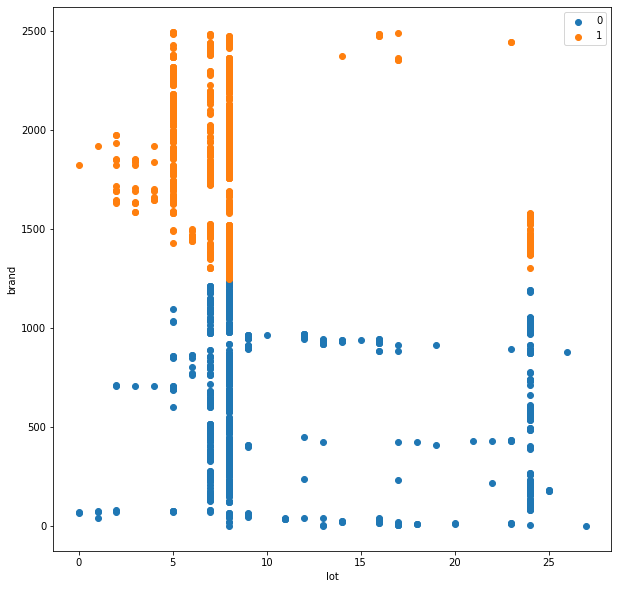

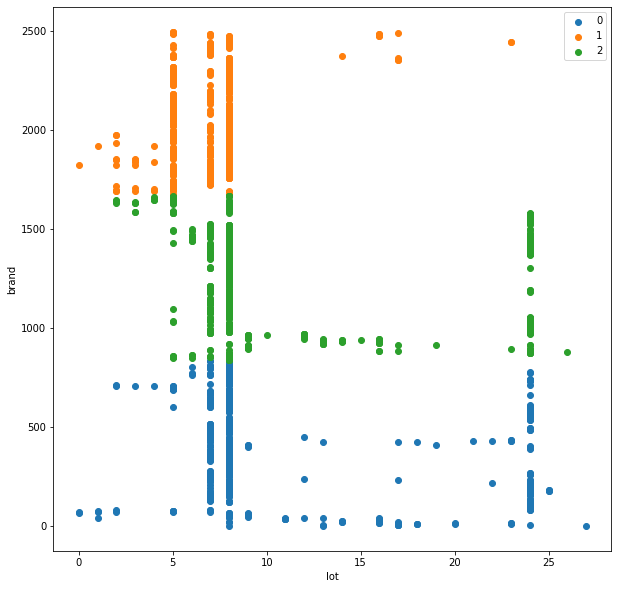

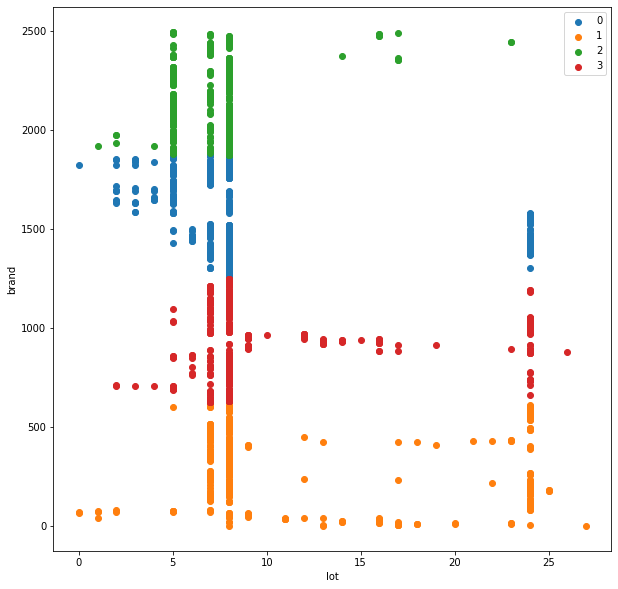

In [ ]:
for i in range(2,5):
  model = KMeans(n_clusters=i, random_state=0)
  label = model.fit_predict(x)

  x['label'] = label

  plt.figure(figsize=(10,10))
  for j in range(i):
    filtered_label0 = x[(x['label'] == j)]

    unfiltered_label0 = df[(df['title_status'] == j)]

    plt.scatter(filtered_label0.iloc[:,1] , filtered_label0.iloc[:,0],label = j)

  plt.xlabel("lot")
  plt.ylabel("brand")
  plt.legend()
  plt.show()